In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Covid-19.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,18110,11-08-2021,8:00 AM,West Bengal,-,-,1506532,18252,1534999
1,18074,10-08-2021,8:00 AM,West Bengal,-,-,1505808,18240,1534360
2,18038,09-08-2021,8:00 AM,West Bengal,-,-,1505089,18229,1533803
3,18002,08-08-2021,8:00 AM,West Bengal,-,-,1504326,18217,1533128
4,17966,07-08-2021,8:00 AM,West Bengal,-,-,1503535,18202,1532379


In [ ]:
df['Year'] = df['Date'].dt.year


state_year_deaths = df.groupby(['State/UnionTerritory', 'Year'])['Deaths'].max().reset_index()
state_year_deaths

,State/UnionTerritory,Year,Deaths
0,Andaman and Nicobar Islands,2020,62
1,Andaman and Nicobar Islands,2021,129
2,Andhra Pradesh,2020,7104
3,Andhra Pradesh,2021,13564
4,Arunachal Pradesh,2020,56
...,...,...,...
71,Uttar Pradesh,2021,22775
72,Uttarakhand,2020,1504
73,Uttarakhand,2021,7368
74,West Bengal,2020,9683


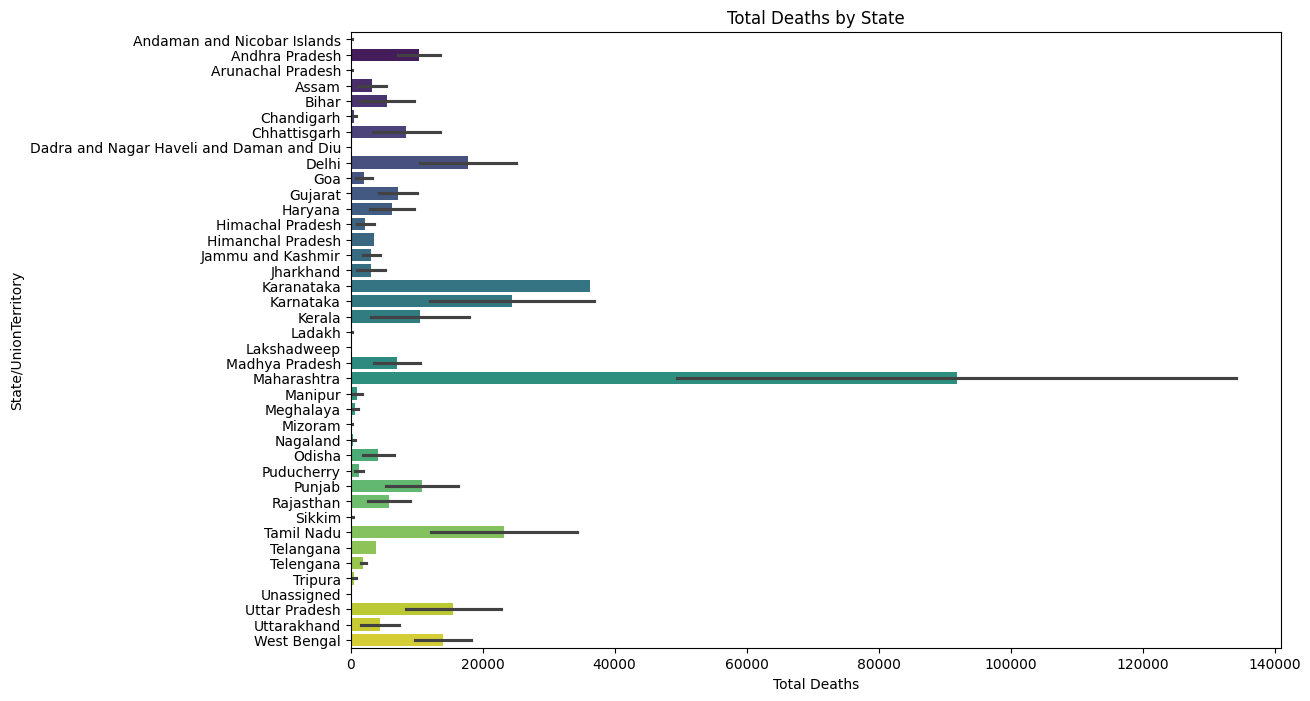

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Deaths', y='State/UnionTerritory', data=state_year_deaths, palette='viridis')
plt.title('Total Deaths by State')
plt.xlabel('Total Deaths')
plt.ylabel('State/UnionTerritory')
plt.show()

In [ ]:
X = state_year_deaths[state_year_deaths['Year'] < 2022][['State/UnionTerritory', 'Year']]
y = state_year_deaths[state_year_deaths['Year'] < 2022]['Deaths']

In [ ]:
predictions = {}

for state in X['State/UnionTerritory'].unique():
    state_data = state_year_deaths[state_year_deaths['State/UnionTerritory'] == state]
    X_state = state_data[state_data['Year'] < 2022][['Year']]
    y_state = state_data[state_data['Year'] < 2022]['Deaths']

    model = LinearRegression()
    model.fit(X_state, y_state)

    predicted_deaths_2022 = model.predict([[2022]])
    predictions[state] = predicted_deaths_2022[0]




predictions

{'Andaman and Nicobar Islands': 196.0,
 'Andhra Pradesh': 20024.0,
 'Arunachal Pradesh': 440.0,
 'Assam': 9797.0,
 'Bihar': 17899.0,
 'Chandigarh': 1306.0,
 'Chhattisgarh': 23738.0,
 'Dadra and Nagar Haveli and Daman and Diu': 6.0,
 'Delhi': 39613.0,
 'Goa': 5591.0,
 'Gujarat': 15852.0,
 'Haryana': 16405.0,
 'Himachal Pradesh': 6143.0,
 'Himanchal Pradesh': 3507.0,
 'Jammu and Kashmir': 6904.0,
 'Jharkhand': 9233.0,
 'Karanataka': 36197.0,
 'Karnataka': 61615.0,
 'Kerala': 32966.0,
 'Ladakh': 287.0,
 'Lakshadweep': 102.0,
 'Madhya Pradesh': 17433.0,
 'Maharashtra': 218939.0,
 'Manipur': 2974.0,
 'Meghalaya': 2231.0,
 'Mizoram': 334.0,
 'Nagaland': 1091.0,
 'Odisha': 11259.0,
 'Puducherry': 2967.0,
 'Punjab': 27313.0,
 'Rajasthan': 15219.0,
 'Sikkim': 585.0,
 'Tamil Nadu': 56625.0,
 'Telangana': 3831.0,
 'Telengana': 3083.0,
 'Tripura': 1161.0,
 'Unassigned': 0.0,
 'Uttar Pradesh': 37198.0,
 'Uttarakhand': 13232.0,
 'West Bengal': 26821.0}